### [데이터 시각화]
- 데이터 셋 : iris.csv
- 해결 문제 : 품종별 시각화에 적합한 특성/속성/컬럼 선정
- 출력 결과 : 선정된 특성을 기반으로 품종 분류한 것 시각화

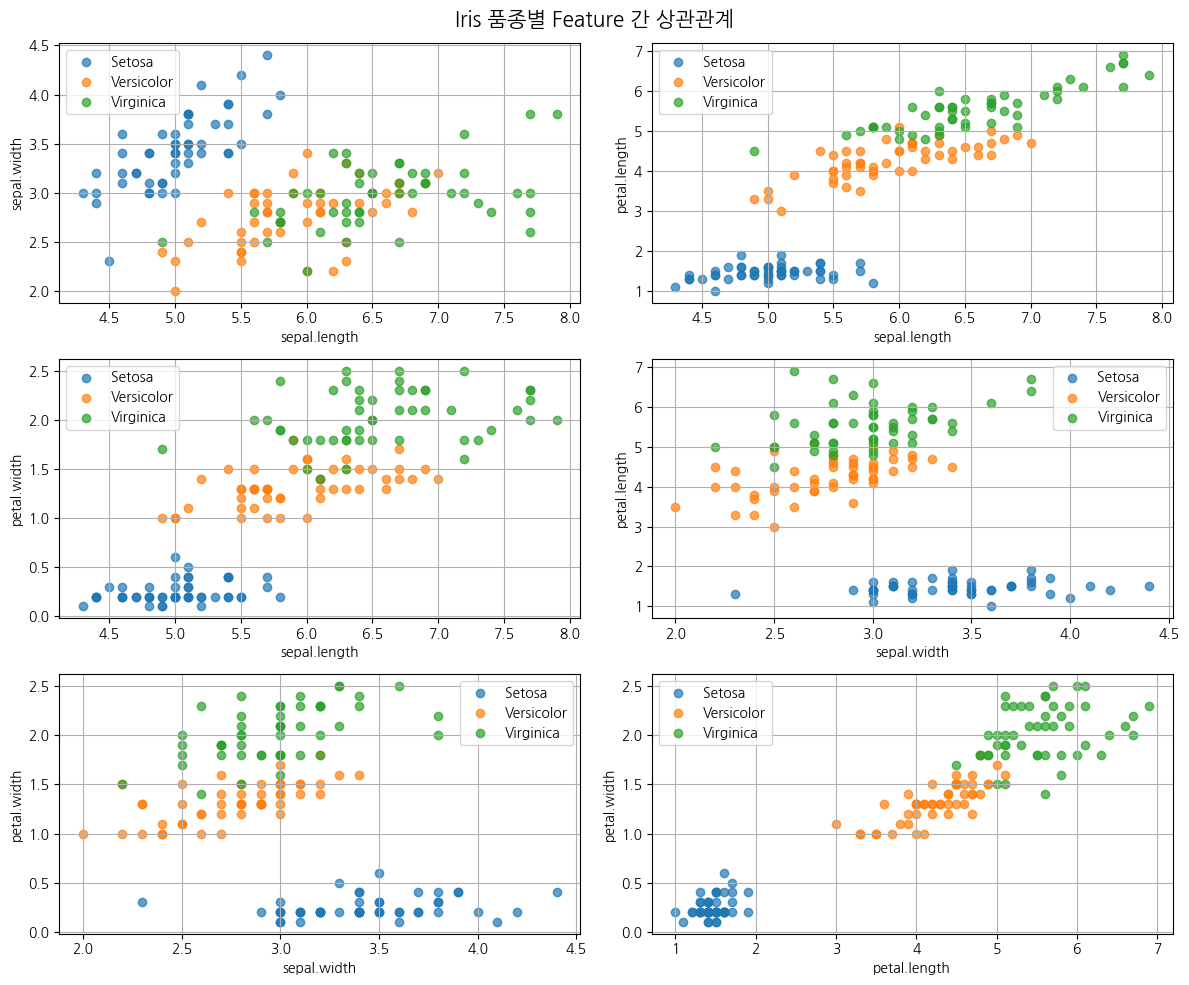

ValueError: num must be an integer with 1 <= num <= 6, not 8

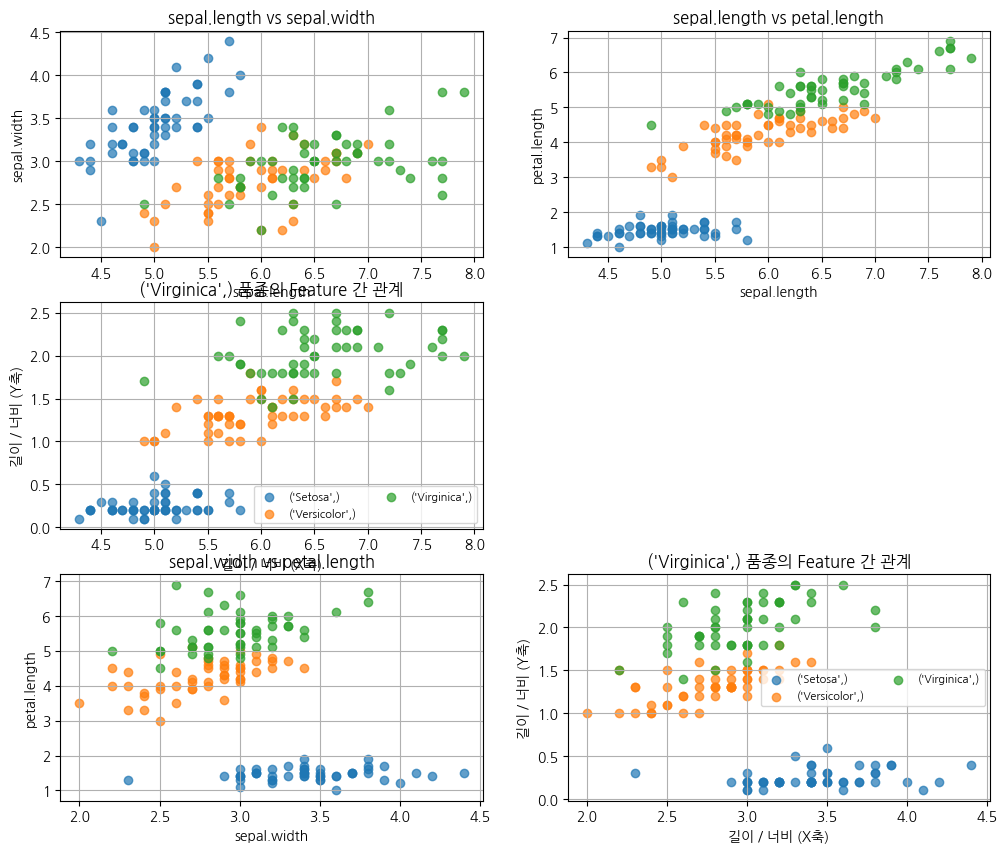

In [ ]:
## 모듈 로딩 및 데이터 셋 준비
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv('../Data/iris.csv')
# display(df.index, df.columns)
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
species_list = df['variety'].unique()

plt.figure(figsize=(12, 10))

plot_num = 1
for i in range(len(features)):
    for j in range(i + 1, len(features)):  # 중복 피하기
        plt.subplot(3, 2, plot_num)
        for sp in species_list:
            group = df[df['variety'] == sp]
            plt.scatter(group[features[i]], group[features[j]], label=sp, alpha=0.7)
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.legend()
        plt.grid(True)
        plot_num += 1

plt.suptitle('Iris 품종별 Feature 간 상관관계', fontsize=15)
plt.tight_layout()
plt.show()




df = df.set_index(['variety'])


## 그룹화
df = df.groupby(['variety'])

## 그룹별 비교
display(df.mean())
print(df.mean().index, df.mean().values)

## 그래프 그리기
fig = plt.figure(figsize = (12,6))
fig.suptitle('Iris Data Analysis', fontsize=16)


## 1번째 그래프
# xData = pd.Series(range(1,14,4))     ## 1, 5, 9, 13
# w = [0, 0.8, 0.8*2, 0.8*3]
# plt.subplot(2,1,1)
# for key in df.groups :
#     print(key)
#     plt.bar(key, df.get_group(key), width=w[])
df_m = df.mean().T.plot.bar(rot=0)
plt.title('Mean values by variety')
plt.ylabel('Mean values')
plt.show()


## 2번째 그래프 
# plt.subplot(2,1,2)
for key in df.groups :
    group= df.get_group(key)
    
    # print(group['sepal.length'], group['sepal.width'])
    plt.scatter(group['petal.length'], group['petal.width'], label=key )
plt.legend()
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.show()